<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/deeplearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [0]:
def logit(z):
  return 1/(1+np.exp(-z)) 

Saving figure sigmoid_saturation_plot


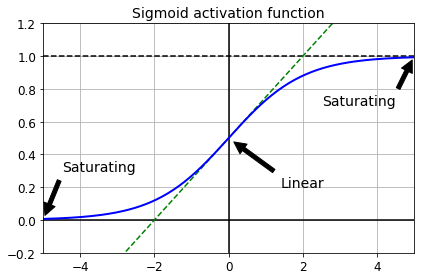

In [3]:
z = np.linspace(-5,5,200) 

plt.plot([-5,5],[0,0],'k-')
plt.plot([-5,5],[1,1],'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

In [0]:
import tensorflow as tf 

reset_graph() 

n_inputs = 28*28 
n_hidden1 = 300 

x = tf.placeholder(tf.float32,shape=(None,n_inputs),name="x")



In [6]:
he_init = tf.variance_scaling_initializer()
hidden1 = tf.layers.dense(x,n_hidden1,activation=tf.nn.relu,
                          kernel_initializer=he_init,name="hidden1")

W0711 21:02:38.746090 139822228359040 deprecation.py:323] From <ipython-input-6-d73260751d48>:3: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


In [0]:
def leaky_relu(z,alpha=0.01):
  return np.maximum(alpha*z,z)

Saving figure leaky_relu_plot


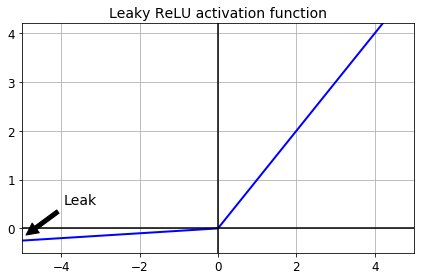

In [8]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [0]:
reset_graph()

x = tf.placeholder(tf.float32,shape=(None,n_inputs),name="x")


In [11]:
def leaky_relu(z,name=None):
  return tf.maximum(0.01*z,z,name=name)

hidden1 = tf.layers.dense(x,n_hidden1,activation=leaky_relu,name="hidden")

W0711 21:04:17.674296 139822228359040 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
reset_graph()

n_inputs = 28*28 
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10 

x = tf.placeholder(tf.float32,shape=(None,n_inputs),name="x")
y = tf.placeholder(tf.int32,shape=(None),name="y") 


In [0]:
with tf.name_scope("dnn"): 
  hidden1 = tf.layers.dense(x,n_hidden1,activation=leaky_relu,name="hidden")
  hidden2 = tf.layers.dense(hidden1,n_hidden2,activation=leaky_relu,name="hidden2")
  logits = tf.layers.dense(hidden2,n_outputs,name="outputs") 
  

In [0]:
with tf.name_scope("loss"):
  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits) 
  loss = tf.reduce_mean(xentropy,name="loss") 

In [15]:
learning_rate = 0.01 

with tf.name_scope("train"):
  optimizer = tf.train.GradientDescentOptimizer(learning_rate) 
  training_op = optimizer.minimize(loss) 

W0711 21:07:45.233914 139822228359040 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
with tf.name_scope("eval"):
  correct = tf.nn.in_top_k(logits,y,1)
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32)) 
  
  

In [0]:
init = tf.global_variables_initializer() 

saver = tf.train.Saver() 

In [18]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data() 

x_train = x_train.astype(np.float32).reshape(-1,28*28) /255.0
x_test = x_test.astype(np.float32).reshape(-1,28*28)/255.0 
y_train = y_train.astype(np.int32) 
y_test = y_test.astype(np.int32) 
x_valid,x_train = x_train[:5000],x_train[5000:]
y_valid,y_train = y_train[:5000],y_train[5000:] 

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def shuffle_batch(x,y,batch_size):
  rnd_idx = np.random.permutation(len(x))
  n_batches = len(x) // batch_size 
    
  for batch_idx in np.array_split(rnd_idx,n_batches):
    x_batch,y_batch = x[batch_idx],y[batch_idx]
    yield x_batch,y_batch 

In [0]:
n_epochs = 40 
batch_size = 50 

with tf.Session() as sess: 
  init.run() 
  for epoch in range(n_epochs):
    for x_batch,y_batch in shuffle_batch(x_train,y_train,batch_size):
      sess.run(training_op,feed_dict={x:x_batch,y:y_batch})
      
    if epoch % 5 == 0: 
      acc_batch = accuracy.eval(feed_dict={x:x_batch,y:y_batch})
      acc_valid = accuracy.eval(feed_dict={x:x_valid,y:y_valid}) 
      
      print(epoch, "batch accuracy:", acc_batch,"validation accuracy:",acc_valid) 
      
  save_path = saver.save(sess,"./my_model_final.ckpt")

0 batch accuracy: 0.92 validation accuracy: 0.9032
5 batch accuracy: 1.0 validation accuracy: 0.9502
10 batch accuracy: 0.98 validation accuracy: 0.965
15 batch accuracy: 1.0 validation accuracy: 0.9724
20 batch accuracy: 1.0 validation accuracy: 0.9752
25 batch accuracy: 0.94 validation accuracy: 0.9764
30 batch accuracy: 0.96 validation accuracy: 0.979


In [0]:
def elu(z,alpha=1):
  return np.where(z<0,alpha*(np.exp(z)-1),z) 

In [0]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [0]:
reset_graph() 

x = tf.placeholder(tf.float32,shape=(None,n_inputs),name="x") 

hidden1 = tf.layers.dense(x,n_hidden1,activation=tf.nn.elu,name="hidden1") 